# Задания

In [1]:
import gdown
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import scipy.stats as st
from datetime import timedelta
import seaborn as sns
import scipy
from scipy.stats import norm

gdown.download("https://drive.google.com/uc?id=1RgGi7QhHLXbeqhk8KjIReLYmskj6uJ7z", "click.csv", quiet=False)
gdown.download("https://drive.google.com/uc?id=1DioViKYMAWQ0L5dxFOSvJnjbdJEpBHAx", "pizza.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1RgGi7QhHLXbeqhk8KjIReLYmskj6uJ7z
To: /content/click.csv
100%|██████████| 4.02k/4.02k [00:00<00:00, 10.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DioViKYMAWQ0L5dxFOSvJnjbdJEpBHAx
To: /content/pizza.csv
100%|██████████| 922k/922k [00:00<00:00, 41.1MB/s]


'pizza.csv'

## Доверительные интервалы

### Задание 1

Построй диаграмму зависимости количества проданной пиццы от дня недели.
Вывести дни недели, в которые продано **больше** и  **меньше** всего пиццы.

In [2]:
# Считываем CSV-файл "pizza.csv" и сохраняем его в переменной df_pizza
# Параметр low_memory=False используется, чтобы Pandas не пытался оптимизировать память, исходя из типов данных (полезно при больших файлах)
# Параметр sep=';' указывает разделитель полей в CSV-файле
df_pizza = pd.read_csv('/content/pizza.csv', low_memory=False, sep=';')

# Выводим содержимое DataFrame df_pizza
df_pizza

,order_details_id,order_id,pizza_id,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,lead_time
0,1,1,hawaiian_m,2015-01-01 00:00:00,11:38:36,"13,25","13,25",M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01 11:53:30
1,2,2,classic_dlx_m,2015-01-01 00:00:00,11:57:40,16,16,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01 12:16:26
2,3,2,five_cheese_l,2015-01-01 00:00:00,11:57:40,"18,5","18,5",L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01-01 12:16:19
3,4,2,ital_supr_l,2015-01-01 00:00:00,11:57:40,"20,75","20,75",L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01 12:10:58
4,5,2,mexicana_m,2015-01-01 00:00:00,11:57:40,16,16,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01-01 12:14:24
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2209,southw_ckn_l,2015-02-06 00:00:00,17:11:37,"20,75","20,75",L,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza,2015-02-06 17:27:19
4996,4997,2209,spicy_ital_s,2015-02-06 00:00:00,17:11:37,"12,5","12,5",S,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",The Spicy Italian Pizza,2015-02-06 17:27:34
4997,4998,2209,veggie_veg_s,2015-02-06 00:00:00,17:11:37,12,12,S,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",The Vegetables + Vegetables Pizza,2015-02-06 17:28:17
4998,4999,2210,classic_dlx_s,2015-02-06 00:00:00,17:24:07,12,12,S,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-02-06 17:44:05


In [3]:
# Создаем новый столбец 'day_name', преобразовывая 'order_date' в дату и извлекая из нее название дня недели
df_pizza['day_name'] = pd.to_datetime(df_pizza['order_date']).dt.day_name()

# Создаем новый DataFrame df, который содержит подсчет количества уникальных значений 'day_name'
# и сбрасываем индекс, чтобы получить структуру данных с двумя столбцами: 'day_name' и 'day_count'
df = df_pizza['day_name'].value_counts().reset_index()

# Переименовываем столбцы в df и выводим таблицу
df.columns = ['day_name', 'day_count']
df

,day_name,day_count
0,Thursday,857
1,Friday,818
2,Saturday,706
3,Tuesday,702
4,Wednesday,655
5,Monday,634
6,Sunday,628


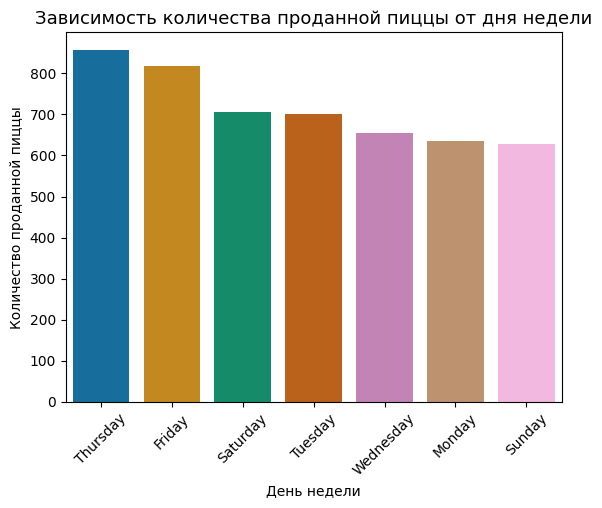

День, в который продано больше всего пиццы: Thursday
День, в который продано меньше всего пиццы: Sunday


In [4]:
# Создаем столбчатую диаграмму (барплот) с указанием данных и цветовой палитры
g = sns.barplot(x='day_name', y='day_count', data=df, palette='colorblind')

# Поворачиваем подписи по оси x на 45 градусов, чтобы сделать их более читаемыми
plt.setp(g.get_xticklabels(), rotation=45)

# Устанавливаем подписи осей и заголовок графика
plt.ylabel('Количество проданной пиццы')
plt.xlabel('День недели')
plt.title("Зависимость количества проданной пиццы от дня недели", fontsize=13)

# Отображаем график
plt.show()

# Выводим информацию о днях с наибольшим и наименьшим количеством проданных пицц
print('День, в который продано больше всего пиццы:', df.day_name[0])
print('День, в который продано меньше всего пиццы:', df.day_name[6])

### Задание 2

Посчитай, сколько **секунд** необходимо для приготовления каждой пиццы по всем заказам. Значения сохранить в новый столбец - `cook_time`. Найти среднее, медианное, максимальное и минимальное время приготовления пиццы. Результат округлите до целого.

In [5]:
# Создаем столбец 'order_date_time', объединяя столбцы 'order_date' и 'order_time' и преобразуя в формат datetime
df_pizza['order_date_time'] = pd.to_datetime(df_pizza['order_date'] + ' ' + df_pizza['order_time'])

# Преобразуем столбец 'lead_time' в формат datetime
df_pizza['lead_time'] = pd.to_datetime(df_pizza['lead_time'])

# Создаем столбец 'cook_time', вычисляя разницу между 'lead_time' и 'order_date_time' в секундах
df_pizza['cook_time'] = (df_pizza['lead_time'] - df_pizza['order_date_time']).dt.total_seconds()

# Выводим статистику по времени приготовления пиццы
print('Среднее время приготовления пиццы, с:', round(df_pizza['cook_time'].mean()))
print('Медианное время приготовления пиццы, с:', round(df_pizza['cook_time'].median()))
print('Максимальное время приготовления пиццы, с:', round(df_pizza['cook_time'].max()))
print('Минимальное время приготовления пиццы, с:', round(df_pizza['cook_time'].min()))

Среднее время приготовления пиццы, с: 1007
Медианное время приготовления пиццы, с: 1006
Максимальное время приготовления пиццы, с: 1609
Минимальное время приготовления пиццы, с: 444


### Задание 3

Построй 95% доверительный интервал для среднего времени приготовления пиццы в **секундах**. Интервал округли до целого
> Для расчета стандартного отклонения используй `numpy.std(ddof=1)`

Формула для расчета доверительного интервала:

$ \text{Confident interval}=\overline{x}\pm t\cdot \frac{Sd}{\sqrt{n}}  $

In [20]:
# Импортируем нужные библиотеки
import scipy.stats as st

# Вычисляем среднее значение времени приготовления
mean = np.mean(df_pizza['cook_time'])

# Вычисляем стандартное отклонение времени приготовления, учитывая коррекцию на выборку
std = np.std(df_pizza['cook_time'], ddof=1)

# Определяем размер выборки
n = len(df_pizza['cook_time'])

# Вычисляем 95% доверительный интервал для среднего значения
confidence_int = st.norm.interval(confidence=0.95, loc=mean, scale=std / np.sqrt(n))

# Округляем значения интервала
a = round(confidence_int[0])
b = round(confidence_int[1])

# Выводим доверительный интервал
print([a, b])

[1002, 1012]


### Задание 4

Хозяин ресторана хочет оптимизировать меню ресторана. При формировании цены на пиццу хозяин хочет учитывать время
её изготовления. Давай найдем ту пиццу (pizza_name), у которой верхняя граница доверительного интервала её изготовления
самая высокая.
> Среди пицц, у которых за все время заказывали более 100 штук

In [7]:
# Создаем датафрейм с количеством каждой пиццы
df4 = df_pizza['pizza_name'].value_counts().reset_index()
df4.columns = ['pizza_name', 'count']

# Выбираем 25 популярных пицц
df_count100 = df4.iloc[:25]
pizza100 = list(df_count100['pizza_name'])

# Оставляем только информацию об этих пиццах в исходном датафрейме
df_pizza100 = df_pizza[df_pizza['pizza_name'].isin(pizza100)]

# Создаем переменные для отслеживания максимального интервала и соответствующей пиццы
max_d = 0
max_delta = 0

# Для каждой из 25 пицц
for pizza in pizza100:

    # Выбираем время приготовления только для данной пиццы
    pizza_cook_time = df_pizza100[df_pizza100['pizza_name'] == pizza]['cook_time']

    # Вычисляем среднее, стандартное отклонение и размер выборки
    mean = np.mean(pizza_cook_time)
    std = np.std(pizza_cook_time, ddof=1)
    n = len(pizza_cook_time)

    # Вычисляем 95% доверительный интервал для среднего значения
    confidence_int = st.norm.interval(confidence=0.95, loc=mean, scale=std / np.sqrt(n))

    # Рассчитываем нижнюю и верхнюю границы интервала, а также его ширину
    c = confidence_int[0]
    d = confidence_int[1]
    delta = d - c

    # Обновляем максимальный интервал и соответствующее имя пиццы
    if d > max_d:
        max_d = d
        max_d_pizza_name = pizza

    # Обновляем максимальную ширину интервала и соответствующее имя пиццы
    if delta > max_delta:
        max_delta = delta
        max_delta_pizza_name = pizza

# Выводим название пиццы с максимальным верхним пределом интервала
print(max_d_pizza_name)

The Italian Vegetables Pizza


### Задание 5

Также хозяину ресторана хочется убрать из меню пиццы с нестабильным временем изготовления.
Давай найдем пиццу с самым широким доверительным интервалом.
> Среди пицц, у которых за все время заказывали более 100 штук

In [8]:
# Находим и выводим название пиццы с самым широким интервалом времени приготовления, среди пицц, которых за все время заказывали более 100 штук
print(max_delta_pizza_name)

The Chicken Alfredo Pizza


## AB тестирование

### Задание 6

В качестве нулевой гипотезы (H0) выберем, что старый баннер лучше нового.  В качестве альтернативной гипотезы (H1) выберем,
что новый баннер лучше старого. Построй 95% доверительный интервал для доли каждого из баннеров, используя метод
[proportion_confint](https://www.statsmodels.org/devel/generated/statsmodels.stats.proportion.proportion_confint.html)
библиотеки statsmodels. Пересекаются ли эти интервалы?

In [9]:
# Импортируем необходимую функцию для вычисления доверительных интервалов пропорций.
from statsmodels.stats.proportion import proportion_confint

# Чтение данных из файла 'click.csv' в датафрейм df_click
df_click = pd.read_csv('/content/click.csv', low_memory=False)

# Вычисляем доверительные интервалы для старого и нового баннеров
confint_a = proportion_confint(df_click.banner_a.sum(), len(df_click))
confint_b = proportion_confint(df_click.banner_b.sum(), len(df_click))

# Выводим полученные доверительные интервалы
print('Доверительный интервал для старого баннера:', confint_a)
print('Доверительный интервал для нового баннера:', confint_b)

# Проверяем, пересекаются ли доверительные интервалы старого и нового баннеров
if confint_a[1] < confint_b[0] or confint_b[1] < confint_a[0]:
    print('Доверительные интервалы не пересекаются.')
else:
    print('Доверительные интервалы пересекаются.')

Доверительный интервал для старого баннера: (0.02530064022092865, 0.04869935977907135)
Доверительный интервал для нового баннера: (0.03911451622486782, 0.06688548377513218)
Доверительные интервалы пересекаются.


### Задание 7

Для более детальной оценки построй 95% доверительный интервал для разности двух долей.
**Ответ дай в формате:**\
95% доверительный интервал для разности двух долей: [0.99847, 9.99847]

Левая и правая границы доверительного интервала рассчитываются по формулам:
$$p_a - p_b \pm z * \sqrt{\frac{p_a(1 - p_a)}{n_a} + \frac{p_b(1 - p_b)}{n_b}}$$
Где

$p_a = \frac{n_{like(a)}}{n_{a}}$,

$p_b = \frac{n_{like(b)}}{n_{b}}$,

$z = 1-\frac{\alpha}{2}$ (используй scipy.stats.norm.ppf)

$n_a$ - общее количество кликов по баннеру а

$n_b$ - общее количество кликов по баннеру b

$n_{like(a)}$ - количество лайков по баннеру а

$n_{like(b)}$ - количество лайков по баннеру b

In [10]:
# Импортируем необходимую функцию из библиотеки scipy.stats
from scipy.stats import norm

# Вычисляем количество "нравится" для баннера A и общее количество событий A
n_like_a = sum(df_click['banner_a'])
n_a = df_click.shape[0]

# Вычисляем количество "нравится" для баннера B и общее количество событий B
n_like_b = sum(df_click['banner_b'])
n_b = df_click.shape[0]

# Вычисляем вероятности "нравится" для A и B
Pa = n_like_a / n_a
Pb = n_like_b / n_b

# Вычисляем критическое значение Z (для 95% доверительного интервала)
z = norm.ppf(1 - 0.05 / 2)

# Вычисляем разность долей с учетом Z-критерия
e = Pa - Pb - z * np.sqrt(Pa * (1-Pa) / n_a + Pb * (1-Pb) / n_b)
e = round(e, 5)

# Вычисляем верхнюю границу интервала
f = Pa - Pb + z * np.sqrt(Pa * (1-Pa) / n_a + Pb * (1-Pb) / n_b)
f = round(f, 5)

# Выводим 95% доверительный интервал для разности долей
print('95% доверительный интервал для разности двух долей: [', e, ',', f, ']')

95% доверительный интервал для разности двух долей: [ -0.03416 , 0.00216 ]


### Задание 8

Проведи АБ-тест. Какой баннер лучше? H0 - Старый баннер или H1 - новый баннер.
В этом тебе поможем функция [z-критерия](code-samples/stats.py).

$$Z({X_1, X_2}) =  \frac{p_a - p_b}{\sqrt{P(1 - P)(\frac{1}{n_a} + \frac{1}{n_b})}}$$
$$P = \frac{p_a{n_a} + p_b{n_b}}{{n_a} + {n_b}} $$

$p_a, p_b = \frac{∑кликов}{n}$, n - общее количество кликов по баннеру

$n_a$ - общее количество кликов по баннеру а

$n_b$ - общее количество кликов по баннеру b

In [11]:
def z_stat(sample1, sample2):
    n_a = len(sample1)
    n_b = len(sample2)

    p_a = float(sum(sample1)) / n_a
    p_b = float(sum(sample2)) / n_b
    P = float(p_a * n_a + p_b * n_b) / (n_a + n_b)

    return (p_a - p_b) / np.sqrt(P * (1 - P) * (1. / n_a + 1. / n_b))

In [12]:
z = z_stat(df_click['banner_a'],df_click['banner_b'])
if z == 0:
    print("z =", z)
    print("Принимаем нулевую гипотезу, значит, старый баннер лучше.")
else:
    print("z =", z)
    print("Опровергаем нулевую гипотезу, значит, новый баннер лучше.")

z = -1.7258261378415294
Опровергаем нулевую гипотезу, значит, новый баннер лучше.


## Корреляции

### Задание 9

Прочитай про корреляции Пирсона и Спирмена. Узнай какие связи между выборками они способны находить. По сгенерированным выборкам посчитай коррелицию Пирсона и Спирмена для выборок `x-y1`, `x-y2`, `x-y3`. Отрисуй выборки в формате, как показано ниже:
<img src="../misc/images/corr.png">

Объясни, почему получается такое значение корреляций.

In [13]:
x = np.linspace(-10,10,100)
y1 = x ** 2
y2 = -x **2
y3 = np.log(x ** 2 + 1)

In [14]:
# Импортируем необходимые библиотеки
import scipy.stats as st

# Вычисляем коэффициенты корреляции Пирсона и Спирмена для трех пар (x, y1), (x, y2), и (x, y3)
P_y1 = st.pearsonr(x, y1)[0]
P_y2 = st.pearsonr(x, y2)[0]
P_y3 = st.pearsonr(x, y3)[0]

S_y1 = st.spearmanr(x, y1)[0]
S_y2 = st.spearmanr(x, y2)[0]
S_y3 = st.spearmanr(x, y3)[0]

# Выводим коэффициенты корреляции Пирсона
print('Коэффициенты корреляции Пирсона.')
print('x-y1:', round(P_y1, 2))
print('x-y2:', round(P_y2, 2))
print('x-y3:', round(P_y3, 2))
print('')

# Выводим коэффициенты корреляции Спирмена
print('Коэффициенты корреляции Спирмена.')
print('x-y1:', round(S_y1, 2))
print('x-y2:', round(S_y2, 2))
print('x-y3:', round(S_y3, 2))


Коэффициенты корреляции Пирсона.
x-y1: -0.0
x-y2: 0.0
x-y3: 0.0

Коэффициенты корреляции Спирмена.
x-y1: -0.0
x-y2: 0.0
x-y3: -0.0


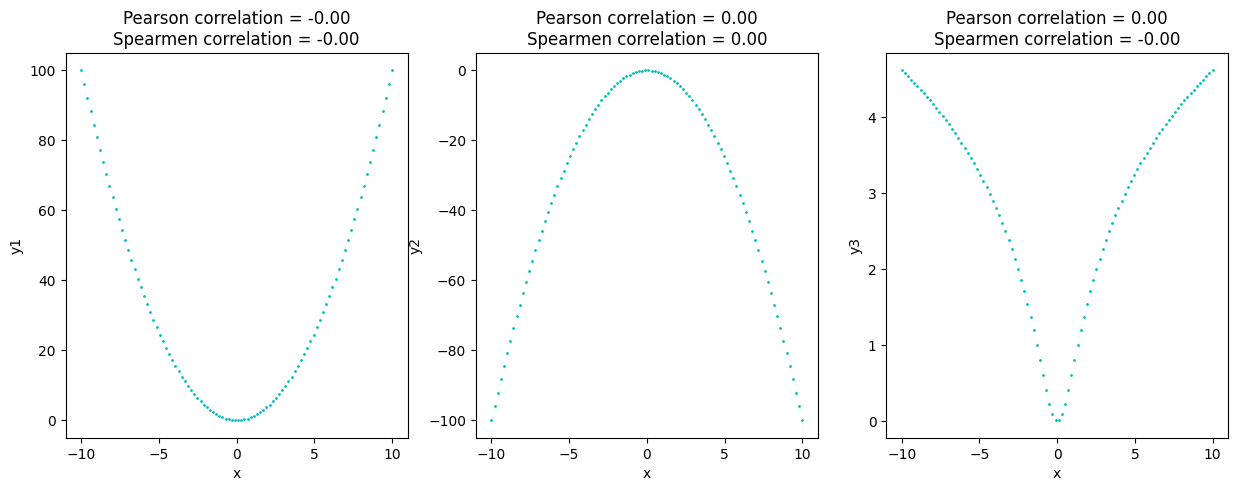

In [15]:
# Импортируем необходимые библиотеки
import matplotlib.pyplot as plt

# Создаем фигуру с 3 графиками в одной строке и размером 15x5
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# График 1: x-y1
ax[0].plot(x, y1, 'co', markersize=1)
ax[0].set(xlabel='x', ylabel='y1', title=f'Pearson correlation = {P_y1:.2f}\nSpearmen correlation = {S_y1:.2f}')

# График 2: x-y2
ax[1].plot(x, y2, 'co', markersize=1)
ax[1].set(xlabel='x', ylabel='y2', title=f'Pearson correlation = {P_y2:.2f}\nSpearmen correlation = {S_y2:.2f}')

# График 3: x-y3
ax[2].plot(x, y3, 'co', markersize=1)
ax[2].set(xlabel='x', ylabel='y3', title=f'Pearson correlation = {P_y3:.2f}\nSpearmen correlation = {S_y3:.2f}')

# Отображаем графики
plt.show()


Нулевая корреляция означает, что между двумя переменными нет связи.

### Задание 10

Построй облако из тысячи точек c помощью приведенного кода.
Выведи значения коэффициентов корреляции.
Случайным образом выбери четыре точки. Каждую из точек передвигать в правый верхний угол относительно облака точек
(тем самым создавая выброс):
значения по оси х 25, 50, 150, 650
по оси y 20, 40, 60, 80.
Выводи на графике перемещения точек.
Для каждого расстояния рассчитай коэффициент корреляции Пирсона и Спирмана.
Какая корреляция больше устойчива к выбросам?

In [16]:
step = np.linspace(-10, 0, 1000)
x = -step + np.random.randn(1000) * 0.2
y = step + np.random.randn(1000)* 0.2

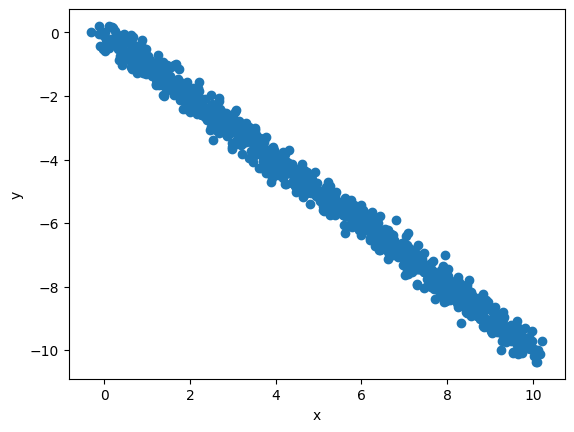

Коэффициент корреляции Пирсона: -0.9954395128784561
Коэффициент корреляции Спирмена: -0.9955522075522077


In [17]:
# Импортируем необходимые библиотеки
import matplotlib.pyplot as plt

# Создаем точечную диаграмму для переменных x и y
plt.scatter(x, y)

# Устанавливаем подписи для осей
plt.xlabel('x')
plt.ylabel('y')

# Отображаем диаграмму
plt.show()

# Вычисляем коэффициенты корреляции Пирсона и Спирмена
P = st.pearsonr(x, y)[0]
S = st.spearmanr(x, y)[0]

# Выводим результаты на экран
print('Коэффициент корреляции Пирсона:', P)
print('Коэффициент корреляции Спирмена:', S)

In [18]:
import random

ran_i = np.random.choice(len(x), size=4, replace=False) # индексы 4 случайно выбранных точек из облака

#Координаты выбранных точек
ran_x = x[ran_i]
ran_y = y[ran_i]

#print(ran_x, ran_y)

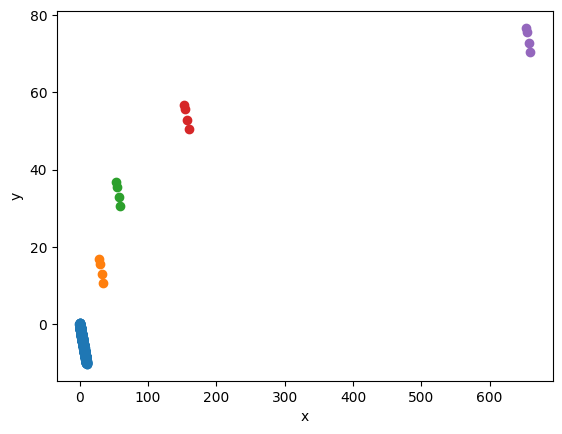

Коэффициент корреляции Пирсона (1 сдвиг): -0.613258904447348
Коэффициент корреляции Спирмена (1 сдвиг): -0.9717959874316514

Коэффициент корреляции Пирсона (2 сдвиг): -0.028275859760634937
Коэффициент корреляции Спирмена (2 сдвиг): -0.9717959874316514

Коэффициент корреляции Пирсона (3 сдвиг): 0.5762024187412924
Коэффициент корреляции Спирмена (3 сдвиг): -0.9717959874316514

Коэффициент корреляции Пирсона (4 сдвиг): 0.8270207587510038
Коэффициент корреляции Спирмена (4 сдвиг): -0.9717959874316514


In [19]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

# Начинаем движение выбранных точек

plt.scatter(ran_x+25, ran_y+20) # 1 сдвиг
plt.scatter(ran_x+50, ran_y+40) # 2 сдвиг
plt.scatter(ran_x+150, ran_y+60) # 3 сдвиг
plt.scatter(ran_x+650, ran_y+80) # 4 сдвиг

plt.show()

# Добавляем выбросы к облаку точек и считаем коэффициенты корреляции
x1 = np.concatenate((ran_x+25, x))
y1 = np.concatenate((ran_y+20, y))

P1 = st.pearsonr(x1, y1)[0]
S1 = st.spearmanr(x1, y1)[0]
print('Коэффициент корреляции Пирсона (1 сдвиг):', P1)
print('Коэффициент корреляции Спирмена (1 сдвиг):', S1)
print()

x2 = np.concatenate((ran_x+50, x))
y2 = np.concatenate((ran_y+40, y))

P2 = st.pearsonr(x2, y2)[0]
S2 = st.spearmanr(x2, y2)[0]
print('Коэффициент корреляции Пирсона (2 сдвиг):', P2)
print('Коэффициент корреляции Спирмена (2 сдвиг):', S2)
print()

x3 = np.concatenate((ran_x+150, x))
y3 = np.concatenate((ran_y+60, y))

P3 = st.pearsonr(x3, y3)[0]
S3 = st.spearmanr(x3, y3)[0]
print('Коэффициент корреляции Пирсона (3 сдвиг):', P3)
print('Коэффициент корреляции Спирмена (3 сдвиг):', S3)
print()

x4 = np.concatenate((ran_x+650, x))
y4 = np.concatenate((ran_y+80, y))

P4 = st.pearsonr(x4, y4)[0]
S4 = st.spearmanr(x4, y4)[0]
print('Коэффициент корреляции Пирсона (4 сдвиг):', P4)
print('Коэффициент корреляции Спирмена (4 сдвиг):', S4)

Корреляция Спирмена больше устойчива к выбросам. Результаты корреляции Спирмена всегда равны -0.9715839814800703, потому что внутри цикла изменяются только значения x, в то время как y остается неизменным.